In [21]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [22]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from utils import MonomersLib, HELMConverter, draw_mol, standardize_mol, is_same_mol

lib = MonomersLib()
monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library_edited.xml"
lib.load_xml(monomers_lib_path)
monomers_lib_path = molgen_path + "data/helm/library/HELMCoreLibrary.json"
lib.load_json(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:03:58] WARNING: not removing hydrogen atom with dummy atom neighbors


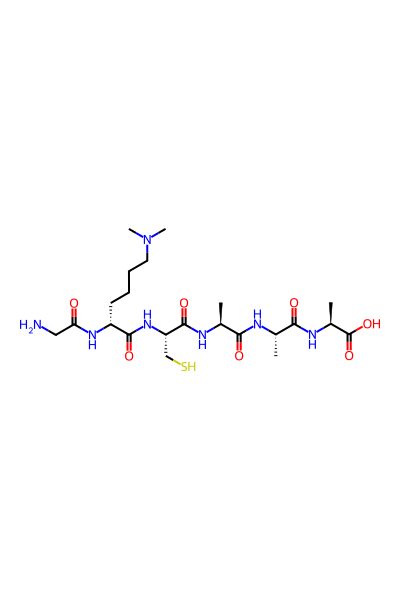

In [24]:
# helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"
# helm = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
# helm = "PEPTIDE1{[dC].[dS].N.[dL].S.[dalloT].[dC].V.L.S.A.Y.W.R.N.L.N.N.F.H.R.F.S.G.M.G.F.G.[dP].Q.T.P}$PEPTIDE1,PEPTIDE1,7:R3-1:R3$$$"
# helm = "PEPTIDE1{[dP].G}|PEPTIDE2{Y.[dOrn].[1-Nal]}$PEPTIDE2,PEPTIDE1,3:R2-1:R1|PEPTIDE2,PEPTIDE1,2:R3-2:R2$$$"
# helm = "PEPTIDE1{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}|PEPTIDE2{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}$PEPTIDE2,PEPTIDE1,2:R3-2:R3$$$"
# helm = "PEPTIDE1{Y.G.G.F.[dD]}|PEPTIDE2{[dR].R}|PEPTIDE3{[dDab].R.P.K.L.K}$PEPTIDE3,PEPTIDE2,1:R3-2:R2|PEPTIDE1,PEPTIDE2,5:R2-1:R1|PEPTIDE1,PEPTIDE3,5:R3-1:R1$$$"
# helm = "PEPTIDE1{[COC(=O)[C@H](CCCCN)N1C(=O)CC[C@@H](NC(=O)OC(C)(C)C)C(=O)N[C@H](Cc2ccccc2)C1=O]}$$$$"
# helm = "PEPTIDE1{F}|PEPTIDE2{[Dab]}|PEPTIDE3{[ac].[dNal].[dPhe(4-Cl)].[d3-Pal].D.E.[dCit].L}|PEPTIDE4{P.[Dpr].[am]}$PEPTIDE2,PEPTIDE4,1:R2-1:R1|PEPTIDE4,PEPTIDE3,2:R3-5:R3|PEPTIDE3,PEPTIDE1,6:R3-1:R1|PEPTIDE2,PEPTIDE1,1:R3-1:R2|PEPTIDE3,PEPTIDE2,8:R2-1:R1$$$"
# helm = "RNA1{R(C)P.R(T)P.R(C)P.R(C)P.R(A)P.R(A)P.R(C)P.R(A)P.R(T)P.R(C)P.R(A)P.R(A)P.R(G)P.R(G)P}$$$$"
helm = "PEPTIDE1{G.[CN(C)CCCC[C@@H](N[*])C([*])=O |$;;;;;;;;;_R1;;_R2;$|].C.A.A.A}$$$$"

mol = converter._convert(helm, verbose=True)
draw_mol(mol, 400, 600)

False
N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)CNC(=O)[C@@H](N)Cc1cnc[nH]1)C(=O)N[C@@H](Cc1ccccc1)C(=O)O ...helm -> smiles
N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CC1=NC=NC1)NC(=O)CNC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N[C@@H](Cc1ccccc1)C(=O)O ...smiles -> smiles
N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CC1=NC=NC1)NC(=O)CNC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N[C@@H](Cc1ccccc1)C(=O)O ...raw


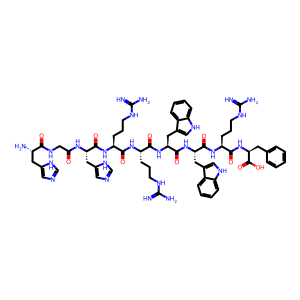

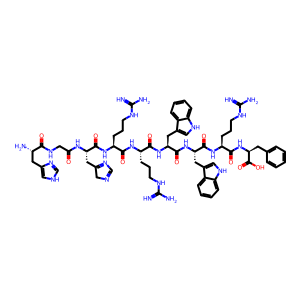

In [33]:
# helm, smiles = "PEPTIDE1{[dC].[dD].G.[Hpr].G.[Hyp].N.[dC].[am]}$PEPTIDE1,PEPTIDE1,8:R3-1:R3$$$", "NC(=O)C[C@@H]1NC(=O)[C@@H]2C[C@@H](O)CN2C(=O)CNC(=O)[C@@H]2CCCCN2C(=O)CNC(=O)[C@@H](CC(=O)O)NC(=O)[C@H](N)CSSC[C@H](C(N)=O)NC1=O"
# helm, smiles = "PEPTIDE1{H.S.K.R.R.L.I.[X11]}$$$$", "CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CO)NC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N/C(=C\c1ccccc1)C(=O)O"
# helm, smiles = "PEPTIDE1{[X1759].[Abu].[Sar].[meV].[dV].[Me_dL].A.[dA].[meL].[meL].[meV]}$PEPTIDE1,PEPTIDE1,11:R2-1:R1$$$", "CC/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C"
helm, smiles = "PEPTIDE1{H.G.H.R.R.W.W.R.F}$$$$", "N=C(N)NCCC[C@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CC1=NC=NC1)NC(=O)CNC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N[C@@H](Cc1ccccc1)C(=O)O"

mol_helm = converter.convert(helm)
mol_helm = Chem.RemoveHs(mol_helm)
mol_smiles = standardize_mol(Chem.MolFromSmiles(smiles))

width = 300
height = 300

print(is_same_mol(mol_helm, mol_smiles))
print(Chem.MolToSmiles(mol_helm) + " ...helm -> smiles")
print(Chem.MolToSmiles(mol_smiles) + " ...smiles -> smiles")
print(smiles + " ...raw")

draw_mol(mol_helm, width, height)
draw_mol(mol_smiles, width, height)

*C(=O)[C@H]([C@H](O)[C@H](C)C/C=C/C)N(*)C


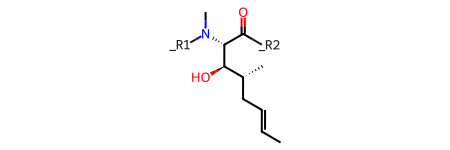

In [9]:
helm = "PEPTIDE1{[X1670]}$$$$" # n=139, removed w:1.0 and added /
mol = converter._convert(helm, close=False)
print(Chem.MolToSmiles(mol))
mol

In [38]:
#test converter

import cProfile
import csv

test_data: list[tuple] = []
file_path = molgen_path + "data/helm/chembl34_protein_helm.csv"

with open(file_path, newline='', encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)    # skip header
    for row in reader:
        test_data.append(tuple(row))

def test():
    lib = MonomersLib()
    monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library_edited.xml"
    lib.load_xml(monomers_lib_path)
    monomers_lib_path = molgen_path + "data/helm/library/HELMCoreLibrary.json"
    lib.load_json(monomers_lib_path)
    converter = HELMConverter(lib)
    success_count = 0
    unmatch_count = 0
    none_count = 0
    for helm, id, smiles in test_data:
        mol1 = converter.convert(helm)
        mol2 = standardize_mol(Chem.MolFromSmiles(smiles))

        if mol1 is None:
            none_count += 1
            print("None - helm: " + helm + ", smiles: " + smiles)
        elif is_same_mol(mol1, mol2):
            success_count += 1
        else:
            unmatch_count += 1
            print("Unmatch - helm: " + helm + ", smiles: " + smiles)
    print("success_count: " + str(success_count) + ", none_count: " + str(none_count) + " unmatch_count: " + str(unmatch_count))

#cProfile.run("test()")
test()

[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:25:19] WARNING: not removing hydrogen atom with dummy atom neighbors


Unmatch - helm: PEPTIDE1{[X1590].L.F}$$$$, smiles: C=C(C)NC(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C(=O)O
Unmatch - helm: PEPTIDE1{[Boc_K].[X2362].I.L}$$$$, smiles: CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)N/C=C/C(=O)[C@@H]1CCCN1C(=O)[C@H](CCCCN)NC(=O)OC(C)(C)C)C(=O)N[C@@H](CC(C)C)C(=O)O
Unmatch - helm: PEPTIDE1{G.C.C.S.[X575].[dP].A.C.A.N.N.Q.D.Y.C.[am]}$$$$, smiles: C[C@H](NC(=O)[C@H](CS)NC(=O)[C@H](C)NC(=O)[C@H]1CCCN1C(=O)[C@H](CC1=CNCN1)NC(=O)[C@H](CO)NC(=O)[C@H](CS)NC(=O)[C@H](CS)NC(=O)CN)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CS)C(N)=O
Unmatch - helm: PEPTIDE1{[X1402].[meW].[d2-Pal].[Sar]}$$$$, smiles: CC(C)C[C@@H](NC(=O)N1CCCCCC1)C(=O)N(C)[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](Cc1ccccn1)C(=O)N(C)CC(=O)[O-].[Na+]
Unmatch - helm: PEPTIDE1{[X1402].[meW].[d2-Pal].F}$$$$, smiles: CC(C)C[C@@H](NC(=O)N1CCCCCC1)C(=O)N(C)[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](Cc1ccccn1)C(=O)N[C@@H](Cc1ccc

[13:25:51] SMILES Parse Error: syntax error while parsing: dLys(Ac)2
[13:25:51] SMILES Parse Error: check for mistakes around position 1:
[13:25:51] dLys(Ac)2
[13:25:51] ^
[13:25:51] SMILES Parse Error: Failed parsing SMILES 'dLys(Ac)2' for input: 'dLys(Ac)2'
[13:25:51] SMILES Parse Error: syntax error while parsing: dLys(BrAc)2
[13:25:51] SMILES Parse Error: check for mistakes around position 1:
[13:25:51] dLys(BrAc)2
[13:25:51] ^
[13:25:51] SMILES Parse Error: Failed parsing SMILES 'dLys(BrAc)2' for input: 'dLys(BrAc)2'


None - helm: PEPTIDE1{Y.[dLys(Ac)2].F.G.Y.P.S}$$$$, smiles: CC(=O)N(CCC[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(=O)O)C(C)=O
None - helm: PEPTIDE1{Y.[dLys(BrAc)2].F.G.Y.P.S}$$$$, smiles: N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@H](CCCCN(C(=O)CBr)C(=O)CBr)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].I.S.Q.L.[X54]}$$$$, smiles: CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C/C=C/S(C)(=O)=O)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].I.S.Q.L.[X886]}$$$$, smiles: CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C/C=C/C(C)=O)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].[X11].H.[dF].[dR].[am]}$$$$, smiles: CC(=O)N/C(=C\c1ccccc1)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N[C@H](Cc1ccccc1)C(=O)N[C@H](CCCNC(=N)N)C(N)=O
Unmatch - helm: PEPTIDE1{[Abu].[Sar].[meL].V.[meL].A.[dA].[me

[13:26:11] SMILES Parse Error: syntax error while parsing: Hpr_OMe
[13:26:11] SMILES Parse Error: check for mistakes around position 1:
[13:26:11] Hpr_OMe
[13:26:11] ^
[13:26:11] SMILES Parse Error: Failed parsing SMILES 'Hpr_OMe' for input: 'Hpr_OMe'
[13:26:11] SMILES Parse Error: syntax error while parsing: Hpr_OMe
[13:26:11] SMILES Parse Error: check for mistakes around position 1:
[13:26:11] Hpr_OMe
[13:26:11] ^
[13:26:11] SMILES Parse Error: Failed parsing SMILES 'Hpr_OMe' for input: 'Hpr_OMe'


Unmatch - helm: PEPTIDE1{[X1760].[Abu].[Sar].[meL].[dV].[Sar].A.[dA].[Me_dL].[Me_dL].[Me_dV]}$PEPTIDE1,PEPTIDE1,11:R2-1:R1$$$, smiles: C/C=C/C[C@@H](C)[C@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)CC(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](C(C)C)C(=O)N1C
Unmatch - helm: PEPTIDE1{[X2064].[dS].[Nle].[dY].[dS].[dC].F.[dW].[Orn].T.[dC].T.[am]}$PEPTIDE1,PEPTIDE1,11:R3-6:R3$$$, smiles: CCCC[C@H](NC(=O)[C@@H](CO)NC(=O)CN(CCN)C(=O)Oc1cc(/C=C\c2cc(OC)c(OC)c(OC)c2)ccc1OC)C(=O)N[C@H](Cc1ccc(O)cc1)C(=O)N[C@H](CO)C(=O)N[C@@H]1CSSC[C@H](C(=O)N[C@H](C(N)=O)[C@@H](C)O)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC1=O
Unmatch - helm: PEPTIDE1{[ac].Y.M.G.W.M.[X451].F.[am]}$$$$, smiles: CSCC[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(C)=O)C(=O)NCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CCSC)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)OS(=O)(=O)[O-].[Na+]
Unmatch - hel